In [18]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'text'])

In [20]:
df['text'].fillna('', inplace=True)

In [21]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [22]:
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    return text

In [23]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [24]:
df['message_length'] = df['cleaned_text'].apply(len)

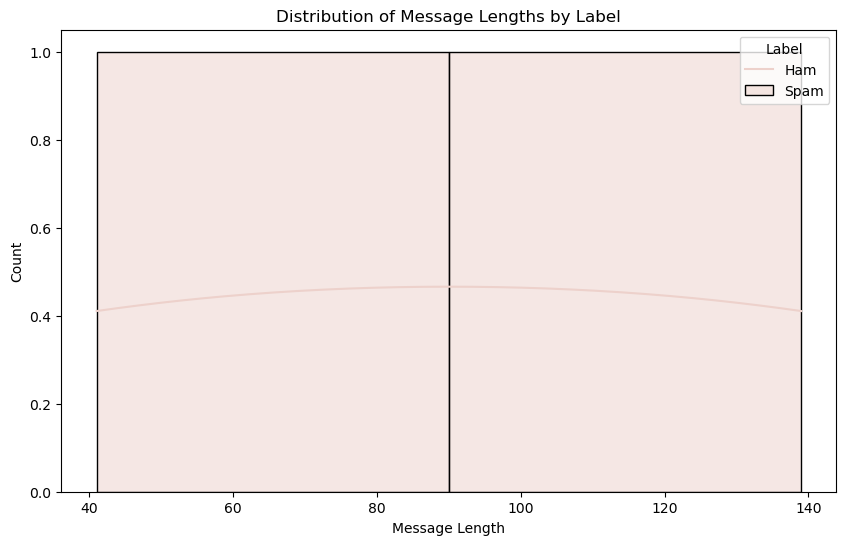

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='label', kde=True)
plt.title('Distribution of Message Lengths by Label')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.show()

In [33]:
ham_messages = ' '.join(df[df['label'] == 0]['cleaned_text']).split()
spam_messages = ' '.join(df[df['label'] == 1]['cleaned_text']).split()

In [34]:
ham_word_freq = Counter(ham_messages)
spam_word_freq = Counter(spam_messages)

In [35]:
ham_word_freq_df = pd.DataFrame(ham_word_freq.most_common(20), columns=['Word', 'Frequency'])
spam_word_freq_df = pd.DataFrame(spam_word_freq.most_common(20), columns=['Word', 'Frequency'])

In [36]:
if spam_word_freq:
    spam_word_freq_df = pd.DataFrame(spam_word_freq.most_common(20), columns=['Word', 'Frequency'])

    # Plot word frequency for spam messages
    plt.figure(figsize=(12, 6))
    sns.barplot(data=spam_word_freq_df, x='Word', y='Frequency')
    plt.title('Top 20 Most Frequent Words in Spam Messages')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No spam messages found.")

No spam messages found.


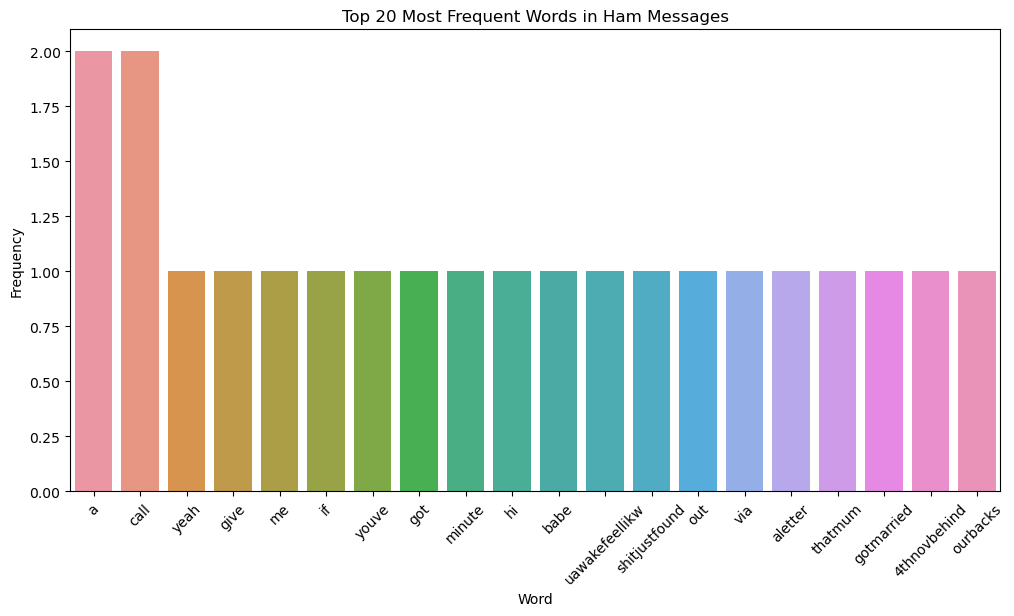

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=ham_word_freq_df, x='Word', y='Frequency')
plt.title('Top 20 Most Frequent Words in Ham Messages')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [29]:
df.to_csv('spam_collection_processed.csv', index=False)